<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link:

**1. Data Analysis and Cleaning**

In [1]:
import pandas as pd
df = pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


***Clean the dataset***

In [2]:
# Handle missing values
# I will clean the data before EDA
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [3]:
# Fill missing values in default column with 0, assuming they should be 0 instead of blanks

df['default'].fillna(0, inplace=True)


/tmp/ipython-input-3-299297904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['default'].fillna(0, inplace=True)


In [4]:
print("Missing values after cleaning:\n",df.isnull().sum())

Missing values after cleaning:
 age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64


***Perform exploratory data analysis (EDA) to understand the dataset***

*Display summary statistics.*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.215294
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.411268
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,0.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


Visualize distributions and relationships between features.

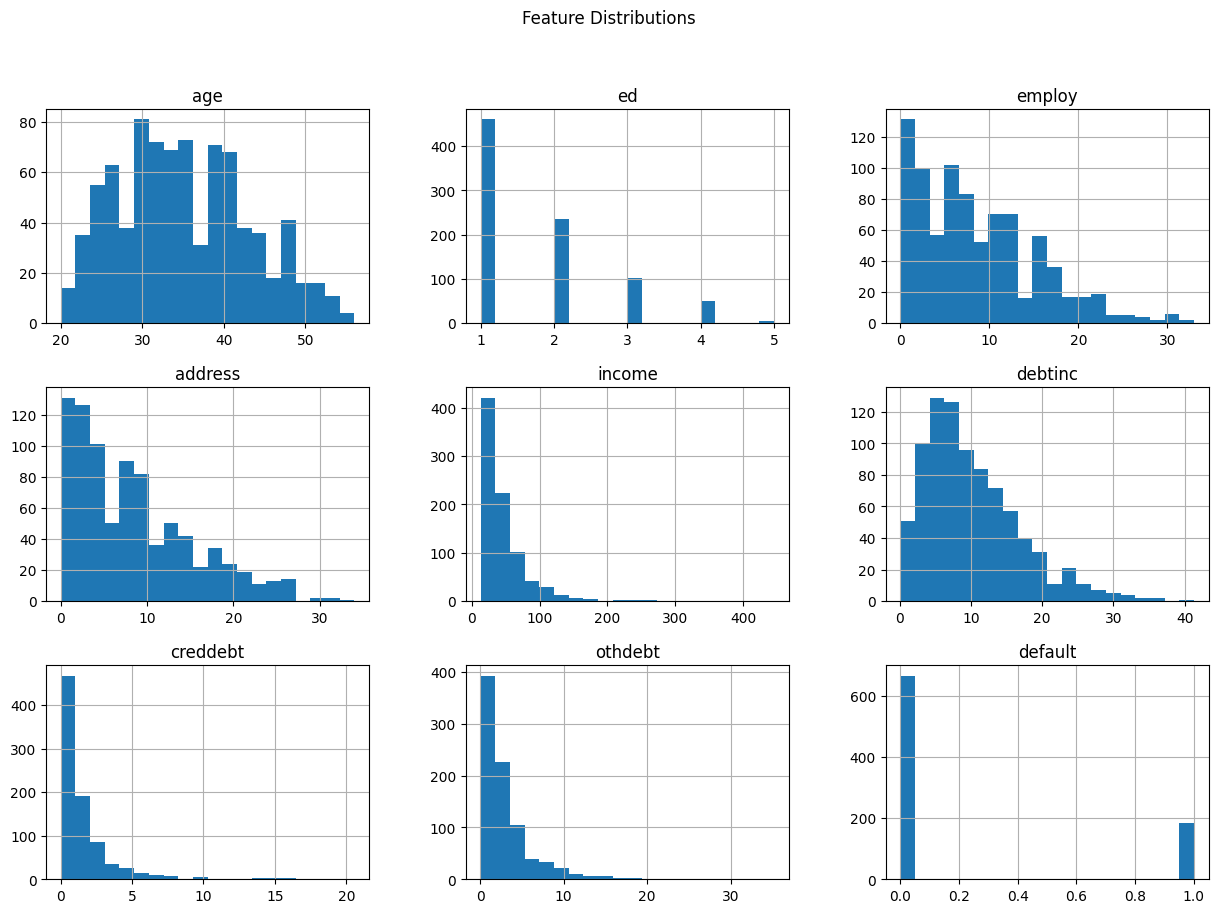

In [7]:
# Histogram of the different features

import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

# All diagrams have a right skewed distribution

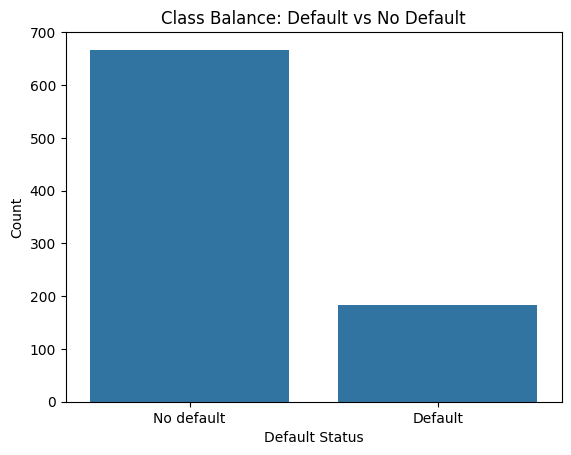

In [8]:
sns.countplot(x='default', data=df)
plt.xticks([0,1],["No default", "Default"])
plt.title("Class Balance: Default vs No Default")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

# No. of people with no default are less at 650 vs default at 180.

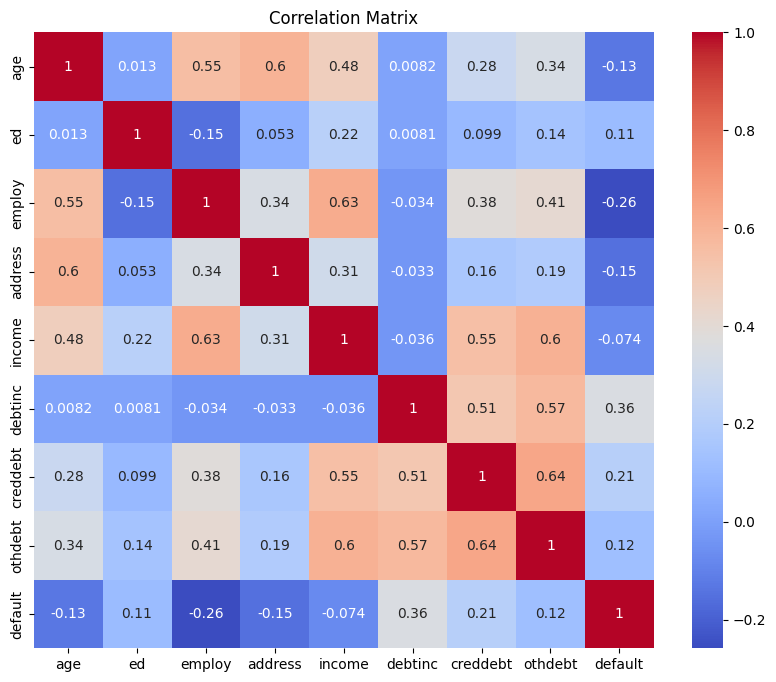

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Lower income may slightly increase default rates- weak negative relationship with default.
# Lower employment years may increase default rates- moderate negative relationship with default.
# Higher debtinc correlates with higher default rates in boxplots- moderate positive relationship with default.
# Higher othdebt & creddebt levels led to higher default- weak positive relationship with default.

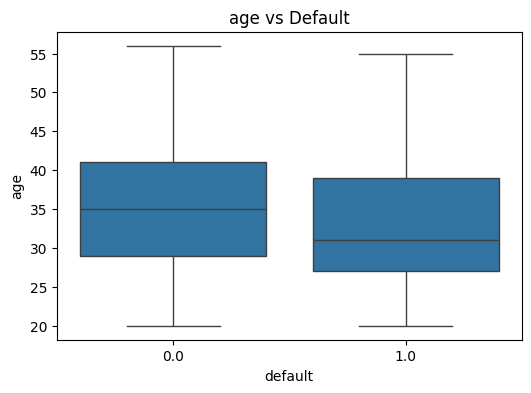

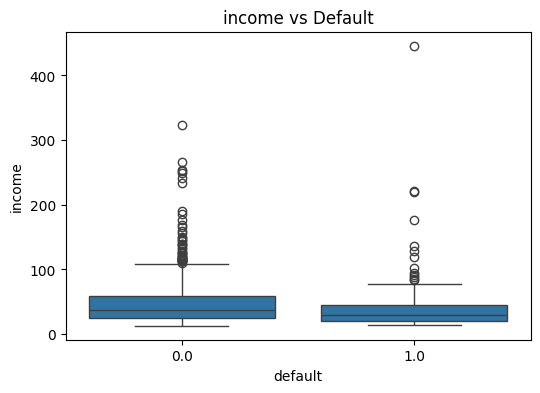

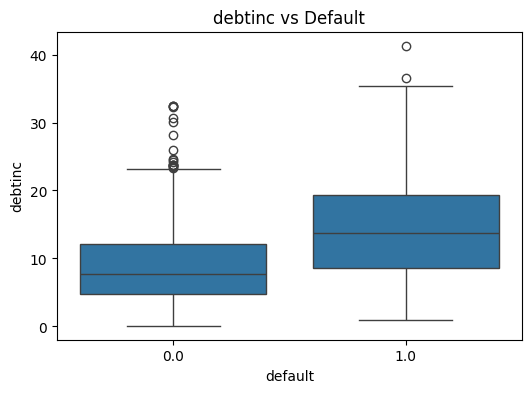

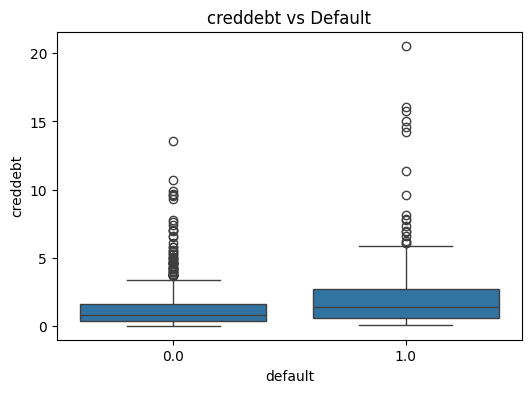

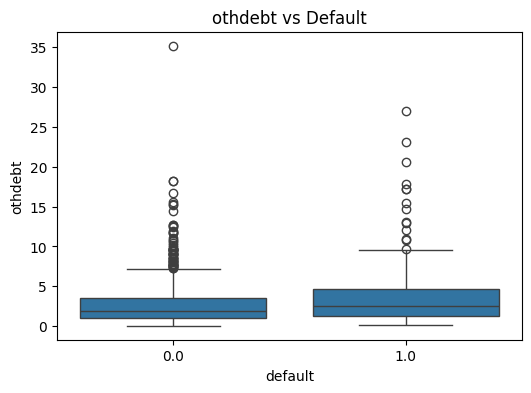

In [10]:
# Boxplots to see relationship with target
for col in ['age', 'income', 'debtinc', 'creddebt', 'othdebt']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f"{col} vs Default")
    plt.show()

# Lower age groups (27-38) were defaulting more vs no default age group (30-40)
# Higher debtinc % (8-19) had more defaults vs (5-12) debtinc % had less defaults.

In [11]:
# Encode categorical variables.

# Not required since we dont have any categorical variables

In [12]:
# Normalize numerical features.

# Saving age column for fairness analysis before normalizing
df['age_raw'] = df['age']

# Columns to scale
num_cols = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,age_raw
0,0.583333,3,0.515152,0.352941,0.376443,0.223301,0.552210,0.141188,1.0,41
1,0.194444,1,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518,0.0,27
2,0.555556,1,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405,0.0,40
3,0.583333,1,0.454545,0.411765,0.247113,0.067961,0.128811,0.022067,0.0,41
4,0.111111,2,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656,1.0,24


**2. Feature Engineering**

***Create new features based on existing data to enhance prediction accuracy.***

In [13]:
# New feature: total debt
df['total_debt'] = df['creddebt'] + df['othdebt']

df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,age_raw,total_debt
0,0.583333,3,0.515152,0.352941,0.376443,0.223301,0.552210,0.141188,1.0,41,0.693398
1,0.194444,1,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518,0.0,27,0.178237
2,0.555556,1,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405,0.0,40,0.101494
3,0.583333,1,0.454545,0.411765,0.247113,0.067961,0.128811,0.022067,0.0,41,0.150878
4,0.111111,2,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656,1.0,24,0.172069


***Scale numerical features to ensure consistency.***

In [14]:
# Scaling the newly added column

new_num_cols = ['total_debt']
df[new_num_cols] = scaler.fit_transform(df[new_num_cols])
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,age_raw,total_debt
0,0.583333,3,0.515152,0.352941,0.376443,0.223301,0.552210,0.141188,1.0,41,0.417728
1,0.194444,1,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518,0.0,27,0.107057
2,0.555556,1,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405,0.0,40,0.060777
3,0.583333,1,0.454545,0.411765,0.247113,0.067961,0.128811,0.022067,0.0,41,0.090558
4,0.111111,2,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656,1.0,24,0.103337


**3. Model Building and Evaluation**

***Split the data into training and testing sets.***

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['default', 'age_raw'], axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

***Train a Random Forest classifier or another algorithm of your choice.***

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the model using:

*Accuracy

*Confusion Matrix

*Classification Report (Precision, Recall, F1-Score)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Overall, the model correctly predicts 79% of the samples.

Accuracy on Test Set: 0.7882


In [18]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# For no default:
# Precision: 0.82 -> Of all predicted as 0, 82% were actually 0.
# Recall: 0.93 -> Of all true 0, 93% were correctly identified.
# F1-score: 0.87 -> High, indicating strong performance on this class.
# Support: 133 samples.

# For default:
# Precision: 0.53 -> Of all predicted as 1, only 53% were actually 1.
# Recall: 0.27 -> Of all true 1, only 27% were correctly identified.
# F1-score: 0.36 -> Low, indicating the model struggles with this class.
# Support: 37 samples.

# 'No default' classification is well-learned by the model but struggles to correctly detect 'default'.

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       133
         1.0       0.53      0.27      0.36        37

    accuracy                           0.79       170
   macro avg       0.67      0.60      0.62       170
weighted avg       0.76      0.79      0.76       170



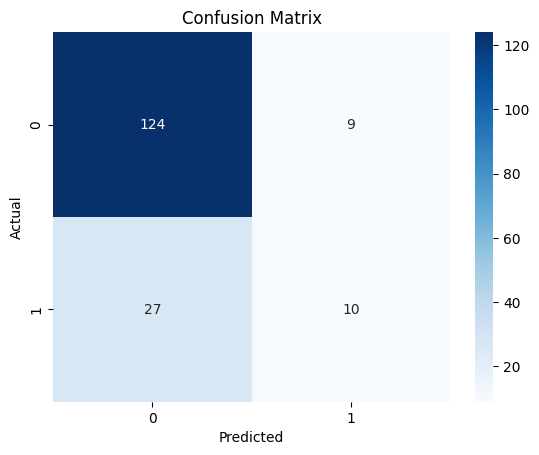

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10 True positives for 1 is too low compared to the others which backs the other accuracy measures showing the model is favoring 0.

***Analyze feature importance to determine which factors impact loan defaults.***

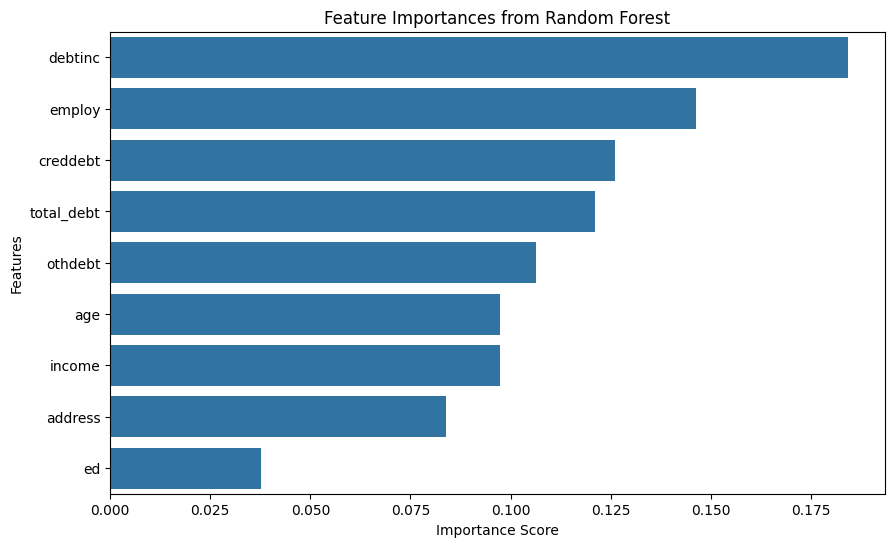

In [20]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Debt to income, employment years & credit debt are the top 3 most important features that are affecting the default rate.

**4. Explainability and Fairness Analysis**

***Use SHAP to explain model predictions and interpret the results.***

In [21]:
!pip install shap


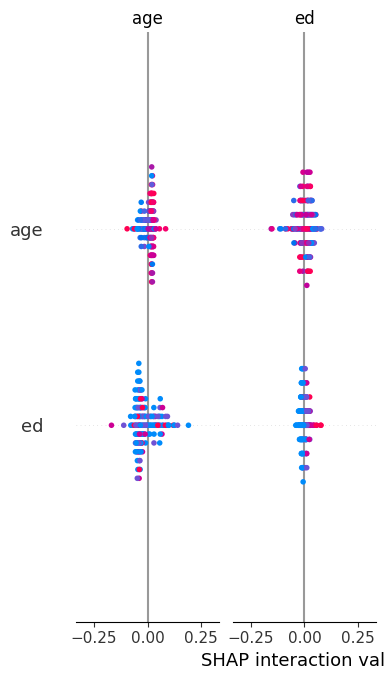

In [33]:
import shap

# Using TreeExplainer since Random Forest is tree-based
explainer = shap.TreeExplainer(rf)

# Calculating SHAP values for test set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# Something is wrong with the plot, age & ed are not the most imporant features but they are the only ones showing here.

***Assess fairness by comparing model performance across demographic groups (e.g., gender).***

In [27]:
!pip install fairlearn

In [25]:
# Creating age group to assess fairness

# Reset indices to align correctly
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
age_raw_test = df.loc[X_test.index, 'age_raw'].reset_index(drop=True)


age_group = pd.cut(age_raw_test, bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])


In [28]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate

# Create a MetricFrame to compute fairness metrics by group

metric_frame = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'false_positive_rate': false_positive_rate,
        'true_positive_rate': true_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features = age_group
)
print(metric_frame.by_group)

# Accuracy is high across groups, but 51-60 has 100% accuracy with 0% selection rate, likely due to no predicted defaults.
# True Positive Rate (Recall for defaulters) varies:
    # High in 18-30, 41-50 (36%).
    # Low in 31-40 (13%).
    # 0 in 51-60 (model predicts no defaults).
# Model underpredicts defaults for 31-40 and 51-60, potentially missing risky customers in these groups.

         accuracy  selection_rate  false_positive_rate  true_positive_rate
age_raw                                                                   
18-30    0.813559        0.135593             0.083333            0.363636
31-40    0.768116        0.072464             0.055556            0.133333
41-50    0.763158        0.157895             0.074074            0.363636
51-60    1.000000        0.000000             0.000000            0.000000


**5. Ethical Considerations**

***Discuss how fairness, privacy, and transparency were handled during model development.***

We assessed model fairness using Fairlearn’s MetricFrame, comparing accuracy, selection rate, false positive rate, true positive rate across age groups to check for differnces.

This ensures equal opportunity for all borrowers and prevents unintentional discrimination.

It will also very critical in financial applications where model decisions can impact loan approvals and interest rates.

As for privacy, no personal identifiable information was used.

SHAP was used for model explainability & transparency, identifying which features influenced predictions.

This transparency:

Allows stakeholders to understand why a loan default was predicted.

Helps detect and prevent spurious or unfair reliance on irrelevant features

***Suggest improvements to address any identified biases.***

 1. Address Data Imbalance:

The dataset is imbalanced, leading to lower recall/TPR for defaults.

Use SMOTE or class weighting to improve recall while maintaining fairness across groups.

 2. Collect More Diverse Data:

Since some age groups have low sample sizes, collect additional data to improve stability and fairness in model predictions.